# Geopandas overlay test

In [39]:
# imports
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point
%matplotlib inline
import matplotlib.pyplot as plt

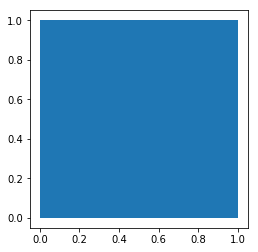

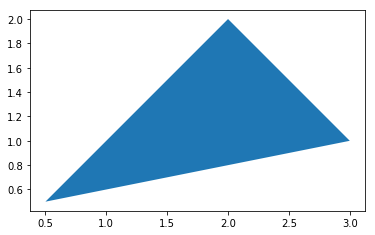

In [41]:
# Initialize a test GeoDataFrame where geometry is a list of points
# Initialize a test GeoDataFrame where geometry is a list of points 
df_box = gpd.GeoDataFrame([['box', Point(1, 0)],
                           ['box', Point(1, 1)],
                           ['box', Point(0,1)],
                           ['box', Point(0,0)]],
                          columns = ['shape_id', 'geometry'],
                          geometry='geometry'
                         )

df_triangle = gpd.GeoDataFrame([['triangle', Point(0.5, 0.5)],
                                ['triangle', Point(2,2)],
                                ['triangle', Point(2,1)]],
                               columns = ['shape_id', 'geometry'],
                               geometry='geometry'
                              )

# Extract the coordinates from the Point object
df_box['geometry'] = df_box['geometry'].apply(lambda x: x.coords[0])
df_triangle['geometry'] = df_triangle['geometry'].apply(lambda x: x.coords[0])


# Group by shape ID 
#  1. Get all of the coordinates for that ID as a list
#  2. Convert that list to a Polygon
df_box = df_box.groupby('shape_id')['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()
df_triangle = df_triangle.groupby('shape_id')['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()

# Declare the result as a new a GeoDataFrame
df_box = gpd.GeoDataFrame(df_box, geometry = 'geometry')
df_triangle = gpd.GeoDataFrame(df_triangle, geometry = 'geometry')

df_box.plot()
df_triangle.plot()

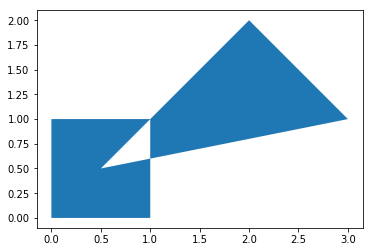

In [48]:
test = gpd.overlay(df_box, df_triangle, how='symmetric_difference', make_valid=True, use_sindex=None) 
# 'intersection', 'union','identity', 'symmetric_difference' or 'difference'
test.plot()